[13, 20, 35, 2]
epoch: 0 -  error:0.13032423229737924
epoch: 1 -  error:0.09220848674094158
epoch: 2 -  error:0.07453461300290311
epoch: 3 -  error:0.06836218766144868
epoch: 4 -  error:0.06561247493671096
epoch: 5 -  error:0.06388347353946336
epoch: 6 -  error:0.06251509163085732
epoch: 7 -  error:0.06127093499857699
epoch: 8 -  error:0.060002076524101486
epoch: 9 -  error:0.05856688810096067
epoch: 10 -  error:0.05690619408615374
epoch: 11 -  error:0.05517132331251518
epoch: 12 -  error:0.05359121469946435
epoch: 13 -  error:0.05224114425965909
epoch: 14 -  error:0.05107711929037368
epoch: 15 -  error:0.05003734827125187
epoch: 16 -  error:0.04907242701107488
epoch: 17 -  error:0.04814770582128703
epoch: 18 -  error:0.04724115014621267
epoch: 19 -  error:0.04633996320366428
epoch: 20 -  error:0.045436551514721056
epoch: 21 -  error:0.044525238376369076
epoch: 22 -  error:0.04360140123539856
epoch: 23 -  error:0.04266313022308316
epoch: 24 -  error:0.04171349203811868
epoch: 25 -  err

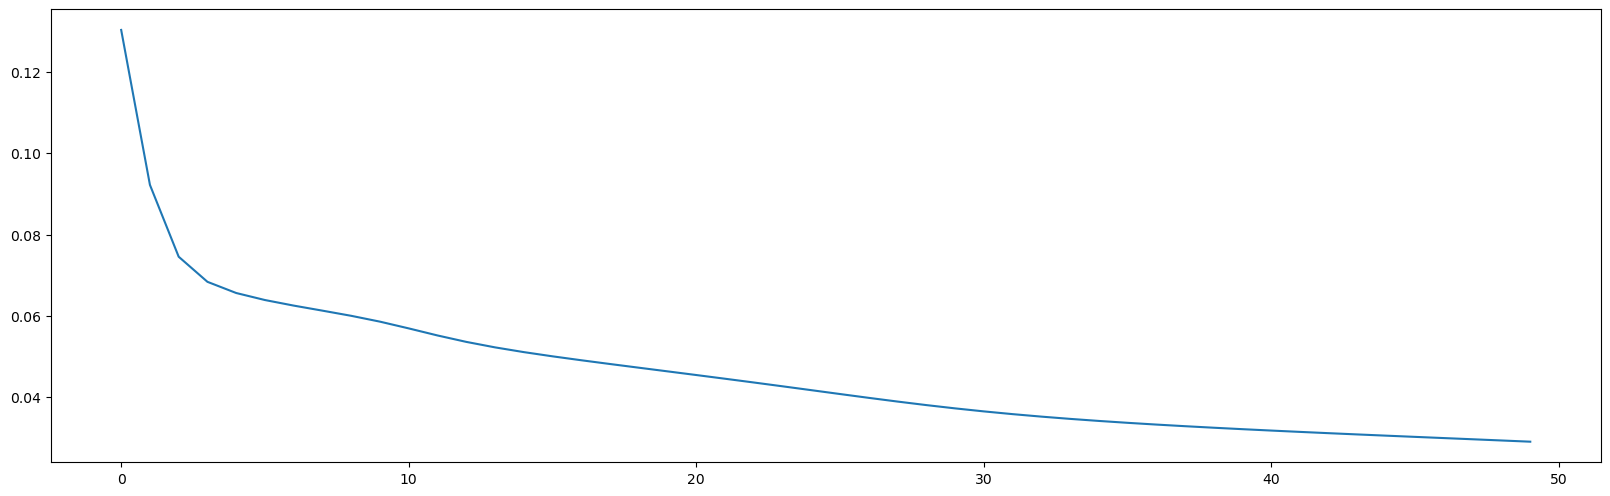

AttributeError: 'Network' object has no attribute 'rmse'

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import network

data3 = pd.read_csv('final-mushroom-dataset.csv', thousands='.', decimal=',', encoding='windows-1251')
train_data3 = data3.sample(frac=0.7)
test_data3 = data3.loc[~data3.index.isin(train_data3.index)]

normalized_train_data3 = network.get_normalized_data(train_data3, 2)
train_mean = normalized_train_data3.mean()
train_std = normalized_train_data3.std()

normalized_test_data3 = network.get_normalized_data(test_data3, 2)
normalized_test_data3 = (normalized_test_data3 - train_mean) / train_std

network = network.Network([13, 20, 35, 2], network.sigmoid, network.sigmoid_prime, True)
errors3 = network.SGD(normalized_train_data3, epochs=50, alpha=0.03, classes_count=2)

fig = plt.gcf()
fig.set_size_inches(20, 20)

plt.subplot(3, 1, 1)
plt.plot(errors3)

plt.show()
print(network.rmse(network, network.Network.prepare_data(normalized_test_data3, 2)))

r2 : 0.8113462181193363
F-measure:  0.8219627642789524


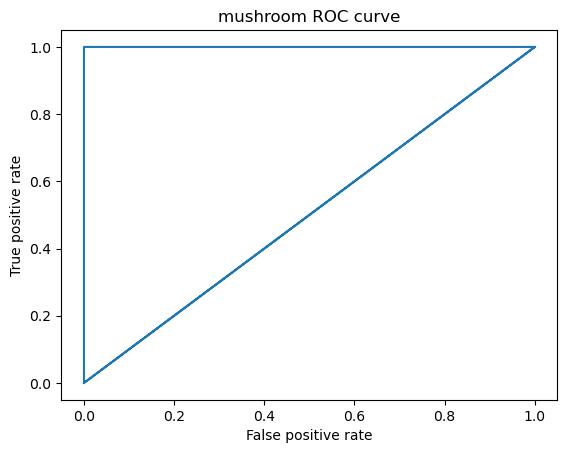

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
import metrik

random_indices = np.random.choice(len(normalized_train_data3), size=len(normalized_test_data3), replace=False)
subset_normalized_train_data3 = normalized_train_data3[random_indices]
print(metrik.calc_r_square(subset_normalized_train_data3, normalized_test_data3))

print(metrik.calc_f_measure(subset_normalized_train_data3, normalized_test_data3))

mushroom_fpr, mushroom_tpr = metrik.calc_roc(subset_normalized_train_data3, normalized_test_data3)

plt.plot(mushroom_fpr, mushroom_tpr)

plt.title('mushroom ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
plt.clf()
